In [56]:
from HTfunctions import *
import matplotlib.pyplot as plt
import os
import pandas as pd

In [124]:
period = "1960_2009"
var = "streamflow"
file = findFiles(f"*Mag*{var}*{period}*","Results/Daily")[0]
print(f"Creating plots for:\n{file}\n")

# checking if plot directory exists for period
# if none exists, a directory is created
out_dir = f"Plots/{period}"
if not os.path.isdir(out_dir):
    print(f"Directory {out_dir} didn't exist. Creating now...")
    os.mkdir(out_dir)
    print("Done.")
else:
    print(f"Directory {out_dir} already exists.")
print(f"All plots are saved in {out_dir}")

# getting the name of file
a = file.split("/")[-1].split(".")[0].split("_")[1:]
period = "-".join(a[-2:])
print("Period:",period)
var = a[0]
print("Variable:",var)
region = a[1]
MA = a[2]
name = "_".join(a)
print(name)

Creating plots for:
Results/Daily/trendMagnitudes_streamflow_ost_10dMA_1960_2009.npy

Directory Plots/1960_2009 already exists.
All plots are saved in Plots/1960_2009
Period: 1960-2009
Variable: streamflow
streamflow_ost_10dMA_1960_2009


In [126]:
# loading the trend array
arr = np.load(file)
print("\nTrend array shape:",arr.shape)


Trend array shape: (21, 365)


In [109]:
finalCatchments = openDict("Data/finalSelectionList")
catchments = finalCatchments[region][period]
print("\nCatchments analysed:")
for c in catchments:
    print(c)


Catchments analysed:
200268
200025
1200137
1500079
200032
200614
200145
200129
1200097
1600066
200011
1200070
1600075
200028
31100460
1600051
200604
31100004
31100006
1500021
200142


In [110]:
# metadata
meta = pd.read_csv("Data/updated_stationselection.csv",index_col=0)

# extracting altitudes
altitudes = {}
for c in catchments:
    altitudes[c] = int(meta[meta.snumber==c].altitude)

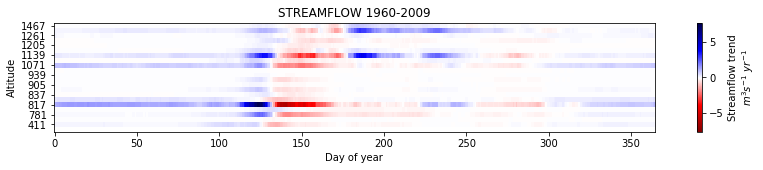

In [130]:
# plotting the trend array
plt.figure(figsize=(15,2))
extent = np.array([np.abs(arr.min()),np.abs(arr.max())]).max()
plt.imshow(arr,aspect=3,cmap="seismic_r",vmax=extent,vmin=-extent)
plt.ylabel("Altitude")
yloc = np.arange(0,arr.shape[0],2)
plt.yticks(yloc,np.array(list(altitudes.values()))[yloc])
plt.ylim(arr.shape[0]+0.5,-0.5)
plt.colorbar(label="Streamflow trend\n$m^{3} s^{-1} \ yr^{-1}$")
plt.title(f"{var.upper()} {period}")
plt.xlabel("Day of year")
plt.savefig(f"{out_dir}/dailyTrend_{name}.png",dpi=400,bbox_inches='tight')

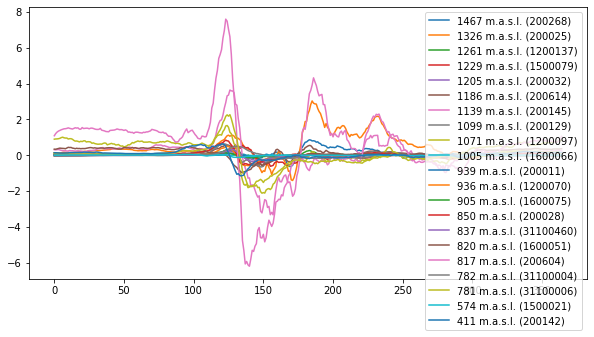

In [131]:
plt.figure(figsize=(10,5))
for c in range(arr.shape[0]):
    catch = catchments[c]
    plt.plot(arr[c,:],label=f"{altitudes[catch]} m.a.s.l. ({catch})")
plt.legend()